# State feedback design for the Apollo moon lander
which has similar dynamics as a quadcopter

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import control as cm
sy.init_printing()
%matplotlib notebook

In [13]:
k1, k2, h = sy.symbols('k1, k2, h', real=True, positive=True)
s = sy.symbols('s', real=True)
z = sy.symbols('z', real=False)

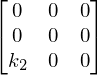

In [4]:
A = sy.Matrix([[0,0,0], [1,0,0], [0,k2,0]])
A*A

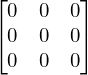

In [5]:
A*A*A

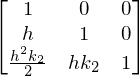

In [14]:
Phi = sy.eye(3) + A*h+ A*A*h**2/2
Phis = sy.eye(3) + A*s+ A*A*s**2/2
Phi

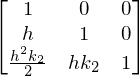

In [20]:
Phim = sy.exp(A*h)
Phim

In [8]:
B = sy.Matrix([[k1],[0],[0]])

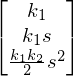

In [15]:
Phis*B

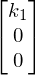

In [11]:
B

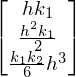

In [23]:
Gammas = sy.integrate(Phis*B, s)
Gamma = Gammas.subs({s:h})
Gamma

## Discrete-time state space model
\begin{align}
x(k+1) &= \Phi(h) x(k) + \Gamma(h)u(k) = \begin{bmatrix}1 & 0 & 0\\h & 1 & 0\\\frac{h^2k_2}{2} & hk_2 & 1 \end{bmatrix} x(k) + k_1h\begin{bmatrix}1\\\frac{h}{2}\\\frac{k_2h^2}{6} \end{bmatrix} u(k)\\
y &= C x(k) = \begin{bmatrix} 0 & 0 & 1\end{bmatrix} x(k)
\end{align}

In the rest of the development, we will work in normalized time, that is $h=1$ and the sampling period is the unit of time. This gives the model
\begin{align}
x(k+1) &= \Phi(h) x(k) + \Gamma(h)u(k) = \begin{bmatrix}1 & 0 & 0\\1 & 1 & 0\\\frac{k_2}{2} & k_2 & 1 \end{bmatrix} x(k) + k_1\begin{bmatrix}1\\\frac{1}{2}\\\frac{k_2}{6} \end{bmatrix} u(k)\\
y &= C x(k) = \begin{bmatrix} 0 & 0 & 1\end{bmatrix} x(k)
\end{align}

## Check observability and controlability

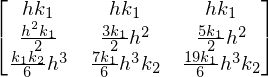

In [35]:
Wc = sy.Matrix(sy.BlockMatrix([[Gamma, Phi*Gamma, Phi*Phi*Gamma]]))
Wc

In [37]:
sy.det(Wc)

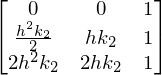

In [39]:
C = sy.Matrix([[0,0,1]])
Wo = sy.Matrix(sy.BlockMatrix([[C], [C*Phi], [C*Phi*Phi]]))
Wo

In [40]:
sy.det(Wo)

## Feedback design
Desired poles (3) in z=0.7, z=0.7+0.1i, z = 0.7-0.1i 




In [55]:
pd = np.array([])
Phi_n = np.array(Phi.subs({h:1.0, k1:1.0, k2:1.0})).asarray(float)
Gamma_n = np.array(Gamma.subs({h:1.0, k1:1.0, k2:1.0}))
l1,l2,l3 = sy.symbols('l1,l2,l3')
L = sy.Matrix([[l1, l2, l3]])
Phi_min_GL = Phi_n - Gamma_n*L
Phi_min_GL

AttributeError: 'numpy.ndarray' object has no attribute 'asarray'

In [53]:
np.asarray([1,1,1], dtype=float)

array([1., 1., 1.])